In [1]:
# analytics
import pandas as pd 
import numpy as np
import scipy.stats as stats
#spatial 
import osmnx as ox
import geopandas as gpd
import contextily as cx
# plotting 
import seaborn as sns
import matplotlib.pyplot as plt
#settings
import warnings

In [2]:
# suppress deprication warnings
warnings.filterwarnings('ignore') 
# plot settings
sns.set_style('darkgrid')
sns.set_palette('rocket')


In [3]:
# load 2023 data set
path = '2023/fema_national_household_survey_2023_data_and_codebook.xlsx'
df = pd.read_excel(path, sheet_name='Coastal Flooding', header=1)

In [4]:
df.shape

(507, 126)

In [5]:
print(list(df.columns))

['id', 'sample', 'hazard_weight', 'state', 'geographic_division', 'census_region', 'zipcode', 'county', 'cfld_awareness', 'cfld_perception', 'cfld_exp', 'cfld_prepactions_a', 'cfld_prepactions_b', 'cfld_prepactions_c', 'cfld_prepactions_d', 'cfld_prepactions_e', 'cfld_prepactions_f', 'cfld_prepactions_g', 'cfld_prepactions_h', 'cfld_prepactions_i', 'cfld_prepactions_j', 'cfld_prepactions_k', 'cfld_prepactions_l', 'cfld_prepactions_m', 'cfld_prepactions_n', 'cfld_stepshelp', 'cfld_confidence', 'cfld_soc', 'cfld_floodzone', 'cfld_driving', 'cfld_safetyafter_a', 'cfld_safetyafter_b', 'cfld_safetyafter_c', 'cfld_safetyafter_d', 'cfld_safetyafter_e', 'cfld_safetyafter_f', 'cfld_atleast1_prepaction', 'cfld_atleast3_prepaction', 'cfld_iawareness', 'cfld_iexp', 'cfld_iprepefficacy', 'cfld_iperception', 'cfld_atleast1_influencer', 'cfld_atleast2_influencer', 'cfld_atleast3_influencer', 'cfld_4_influencer', 'cfld_3_prepstages', 'cfld_2_prepstages', 'age', 'sex', 'sex_open', 'education', 'vocatio

<span style='color:orange'>
Let's select the important variables
<span>

In [6]:
variables = ['id','state','zipcode','geographic_division','census_region','county','cfld_awareness','cfld_perception','cfld_exp',
             'cfld_floodzone','cfld_prepactions_a','cfld_prepactions_b','cfld_prepactions_c','cfld_prepactions_d','cfld_prepactions_e',
             'cfld_prepactions_f','cfld_prepactions_g','cfld_prepactions_h','cfld_prepactions_i','cfld_prepactions_j','cfld_prepactions_k',
             'cfld_prepactions_l','cfld_prepactions_m','cfld_prepactions_n','age','sex','education','education_original','ethnicity',
             'homeownership','income','income_original','rentmortgage']

In [7]:
sub_df = df[variables]
sub_df.head()

,id,state,zipcode,geographic_division,census_region,county,cfld_awareness,cfld_perception,cfld_exp,cfld_floodzone,...,cfld_prepactions_n,age,sex,education,education_original,ethnicity,homeownership,income,income_original,rentmortgage
0,1,Washington,98033,Pacific,West,King,No,Very likely,No,No,...,Blank,20-29,Male,Bachelor's degree,Bachelor's degree,Non-Hispanic/Latino,Own,"$75,000 to $99,999","$75,000 to $99,999","$1,001 - $1,500"
1,2,Florida,33950,South Atlantic,South,Charlotte,Yes,Likely,Yes,Yes,...,Blank,50-59,Female,Post graduate work/degree or professional degree,Post graduate work/degree or professional degree,Non-Hispanic/Latino,Own,"$150,000 to $199,999","$150,000 to $199,999","More than $3,000"
2,3,New Jersey,7031,Middle Atlantic,Northeast,Bergen,No,Likely,Yes,No,...,Blank,30-39,Female,High school degree or diploma,High school degree or diploma,Hispanic/Latino,Rent,"$35,000 to $49,999","$35,000 to $49,999","$1,001 - $1,500"
3,4,Pennsylvania,19115,Middle Atlantic,Northeast,Philadelphia,Don't know,Don't know,Don't know,No,...,Don't know,40-49,Female,High school degree or diploma,High school degree or diploma,Non-Hispanic/Latino,Rent,"$50,000 to $74,999","$50,000 to $74,999",Don't know
4,5,Pennsylvania,19148,Middle Atlantic,Northeast,Philadelphia,No,Likely,Yes,No,...,Blank,30-39,Male,Bachelor's degree,Bachelor's degree,Non-Hispanic/Latino,Own,"$100,000 to $149,999","$100,000 to $149,999","$1,001 - $1,500"


<span style='color:orange'>
Let's start exploring:
<span>

- dtypes
- duplicates


In [8]:
sub_df.dtypes

id                      int64
state                  object
zipcode                 int64
geographic_division    object
census_region          object
county                 object
cfld_awareness         object
cfld_perception        object
cfld_exp               object
cfld_floodzone         object
cfld_prepactions_a     object
cfld_prepactions_b     object
cfld_prepactions_c     object
cfld_prepactions_d     object
cfld_prepactions_e     object
cfld_prepactions_f     object
cfld_prepactions_g     object
cfld_prepactions_h     object
cfld_prepactions_i     object
cfld_prepactions_j     object
cfld_prepactions_k     object
cfld_prepactions_l     object
cfld_prepactions_m     object
cfld_prepactions_n     object
age                    object
sex                    object
education              object
education_original     object
ethnicity              object
homeownership          object
income                 object
income_original        object
rentmortgage           object
dtype: obj

In [9]:
(sub_df.education_original != sub_df.education).any()

True

In [10]:
print((sub_df.income_original != sub_df.income).any())

True


#### Note that the above two checks revealed differences between both variables. Removed for now but lets have a look later

<span style='color:orange'>
high-level overviews and first patterns
<span>

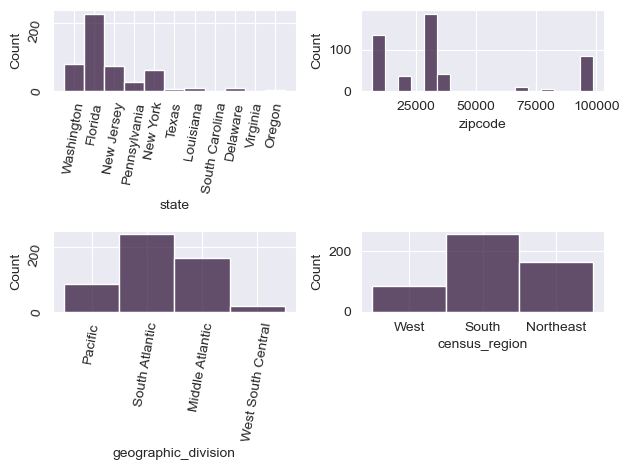

In [11]:
fig, ax = plt.subplots(2,2)

sns.histplot(sub_df.state, ax = ax[0,0])
sns.histplot(sub_df.zipcode, ax = ax[0,1])
sns.histplot(sub_df.geographic_division, ax = ax[1,0])
sns.histplot(sub_df.census_region, ax = ax[1,1])

#adjust individual x label rotations for readability
ax[0,0].tick_params(rotation = 80)
ax[1,0].tick_params(rotation = 80)

sns.set_style('darkgrid')
plt.tight_layout() # avoid overlap of labels

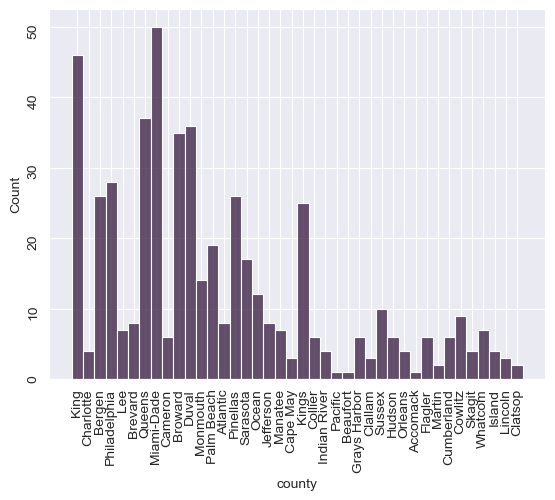

In [12]:
ax = sns.histplot(sub_df.county)
ax.tick_params(rotation=90)


<span style="color:lightgreen">
findings: 

- only respondents in flood regions are included
- most respondents from florida 
- pacific underrepresnted compared to atlantic
<span>




<span style="color:orange">
to understand spatial distribution of respondents (and other variables, we will have to add shapefiles)

let's look into response variables first
<span>

In [13]:
sub_df.columns

Index(['id', 'state', 'zipcode', 'geographic_division', 'census_region',
       'county', 'cfld_awareness', 'cfld_perception', 'cfld_exp',
       'cfld_floodzone', 'cfld_prepactions_a', 'cfld_prepactions_b',
       'cfld_prepactions_c', 'cfld_prepactions_d', 'cfld_prepactions_e',
       'cfld_prepactions_f', 'cfld_prepactions_g', 'cfld_prepactions_h',
       'cfld_prepactions_i', 'cfld_prepactions_j', 'cfld_prepactions_k',
       'cfld_prepactions_l', 'cfld_prepactions_m', 'cfld_prepactions_n', 'age',
       'sex', 'education', 'education_original', 'ethnicity', 'homeownership',
       'income', 'income_original', 'rentmortgage'],
      dtype='object')

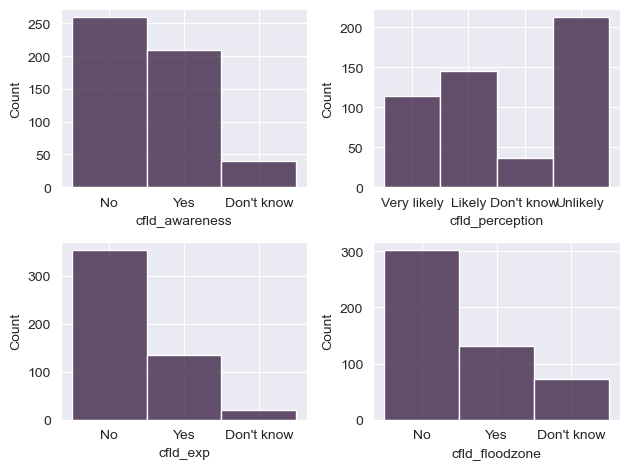

In [14]:
fig, ax = plt.subplots(2,2)

sns.histplot(sub_df.cfld_awareness, ax = ax[0,0])
sns.histplot(sub_df.cfld_perception, ax = ax[0,1])
sns.histplot(sub_df.cfld_exp, ax = ax[1,0])
sns.histplot(sub_df.cfld_floodzone, ax = ax[1,1])

sns.set_style('darkgrid')
plt.tight_layout() # avoid overlap of labels

#### The above two have been left out for now. Note that variable and variable_original are not identical on each line!!!

In [15]:
# remove dubplicates
sub_df.drop(columns=['education_original','income_original'],inplace=True);
sub_df.columns

Index(['id', 'state', 'zipcode', 'geographic_division', 'census_region',
       'county', 'cfld_awareness', 'cfld_perception', 'cfld_exp',
       'cfld_floodzone', 'cfld_prepactions_a', 'cfld_prepactions_b',
       'cfld_prepactions_c', 'cfld_prepactions_d', 'cfld_prepactions_e',
       'cfld_prepactions_f', 'cfld_prepactions_g', 'cfld_prepactions_h',
       'cfld_prepactions_i', 'cfld_prepactions_j', 'cfld_prepactions_k',
       'cfld_prepactions_l', 'cfld_prepactions_m', 'cfld_prepactions_n', 'age',
       'sex', 'education', 'ethnicity', 'homeownership', 'income',
       'rentmortgage'],
      dtype='object')

<span style='color:orange'>
Le'ts have a first look at unimodal distributions
<span>

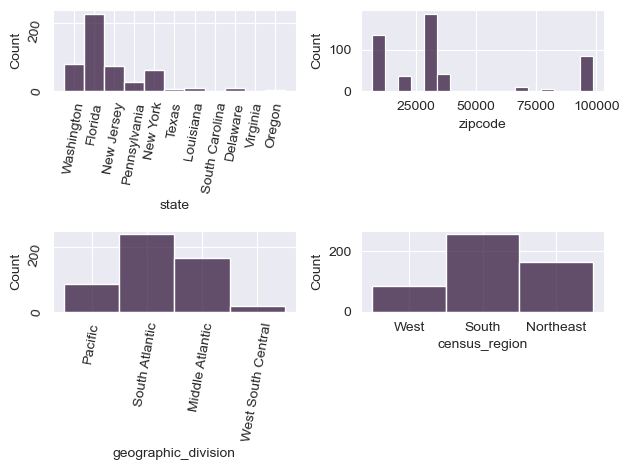

In [16]:
fig, ax = plt.subplots(2,2)

sns.histplot(sub_df.state, ax = ax[0,0])
sns.histplot(sub_df.zipcode, ax = ax[0,1])
sns.histplot(sub_df.geographic_division, ax = ax[1,0])
sns.histplot(sub_df.census_region, ax = ax[1,1])

#adjust individual x label rotations for readability
ax[0,0].tick_params(rotation = 80)
ax[1,0].tick_params(rotation = 80)

plt.tight_layout() # avoid overlap of labels

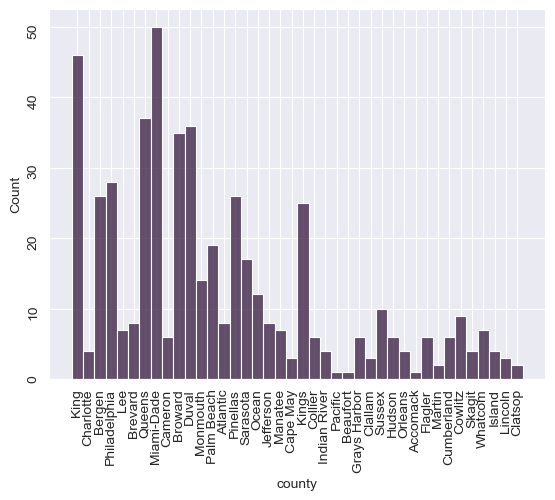

In [17]:
ax = sns.histplot(sub_df.county)
ax.tick_params(rotation=90)

<span style="color:lightgreen">
findings: 

- only respondents in flood regions are included
- most respondents from florida 
- pacific underrepresnted compared to atlantic
<span>




<span style="color:orange">
to understand spatial distribution of respondents (and other variables, we will have to add shapefiles)


->let's look into responses
<span>

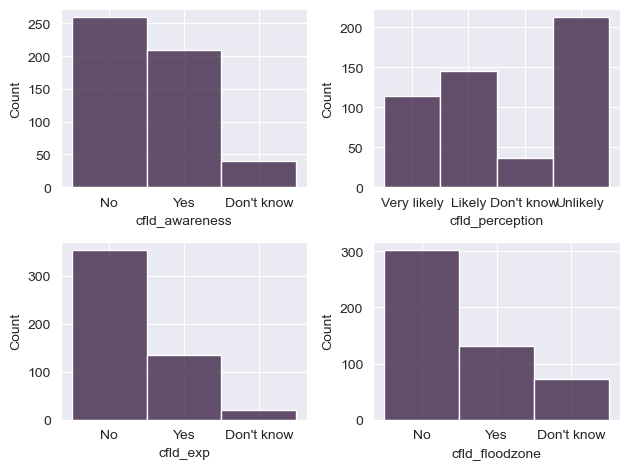

In [18]:
fig, ax = plt.subplots(2,2)

sns.histplot(sub_df.cfld_awareness, ax = ax[0,0])
sns.histplot(sub_df.cfld_perception, ax = ax[0,1])
sns.histplot(sub_df.cfld_exp, ax = ax[1,0])
sns.histplot(sub_df.cfld_floodzone, ax = ax[1,1])

plt.tight_layout() # avoid overlap of labels

<span style='color:lightgreen'>
findings: 

- ca 60% respondents do not live in a flood zone. That can in part be bc not every flood area is mapped by FEMA yet
- ca 20% has experienced flood before
- cfld_perception gives rich data distribution

<span style='color:orange'>
Let's have a look at adaptation measures

In [19]:
sub_df.cfld_prepactions_b

0                                Blank
1      Documented and insured property
2                                Blank
3                                Blank
4      Documented and insured property
                    ...               
502                              Blank
503                              Blank
504                              Blank
505                              Blank
506                              Blank
Name: cfld_prepactions_b, Length: 507, dtype: object

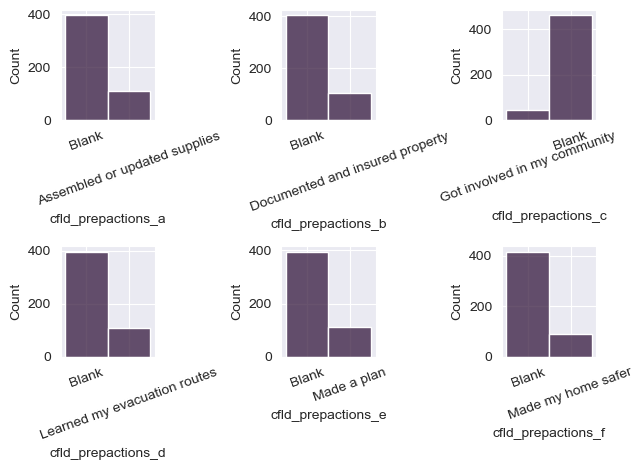

In [20]:
fig, ax = plt.subplots(2,3)

sns.histplot(sub_df.cfld_prepactions_a, ax = ax[0,0])
sns.histplot(sub_df.cfld_prepactions_b, ax = ax[0,1])
sns.histplot(sub_df.cfld_prepactions_c, ax = ax[0,2])
sns.histplot(sub_df.cfld_prepactions_d, ax = ax[1,0])
sns.histplot(sub_df.cfld_prepactions_e, ax = ax[1,1])
sns.histplot(sub_df.cfld_prepactions_f, ax = ax[1,2])

[ax.tick_params(axis = 'x', rotation=20)for ax in fig.axes] # rotate x axis labels for better readabililty
ax = plt.tight_layout() # avoid overlap of labels

<Axes: xlabel='cfld_prepactions_c', ylabel='Count'>

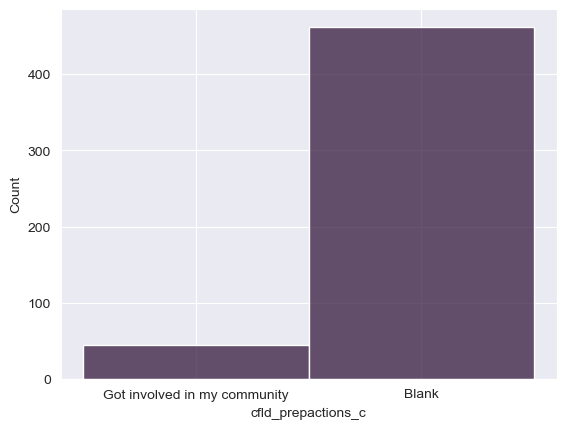

In [21]:
sns.histplot(sub_df.cfld_prepactions_c)

In [22]:
sub_df.cfld_prepactions_g.unique()

array(['Blank', 'Planned with neighbors'], dtype=object)

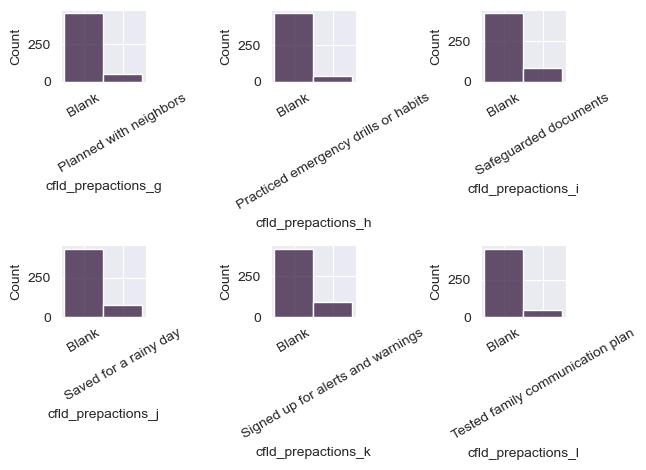

In [23]:
fig, ax = plt.subplots(2,3)
sns.histplot(sub_df.cfld_prepactions_g, ax = ax[0,0])
sns.histplot(sub_df.cfld_prepactions_h, ax = ax[0,1])
sns.histplot(sub_df.cfld_prepactions_i, ax = ax[0,2])
sns.histplot(sub_df.cfld_prepactions_j, ax = ax[1,0])
sns.histplot(sub_df.cfld_prepactions_k, ax = ax[1,1])
sns.histplot(sub_df.cfld_prepactions_l, ax = ax[1,2])

[ax.tick_params(axis = 'x', rotation = 30) for ax in fig.axes] # rotate x axis labels for better readabililty
plt.tight_layout() # avoid overlap of labels

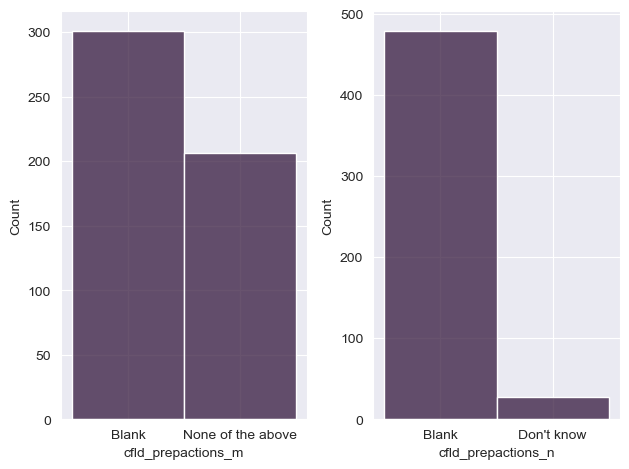

In [24]:
fig, ax = plt.subplots(1,2)

sns.histplot(sub_df.cfld_prepactions_m, ax = ax[0])
sns.histplot(sub_df.cfld_prepactions_n, ax = ax[1])
plt.tight_layout()

<span style = 'color: lightgreen'>
findings: 

- 40% of respondents have implemented nothing
<span>


<span style = 'color: orange'>
Let's look at some correlations
<span>


<span style= 'color:orange'>
Let's change the variable coding and dtypes to numeric
<span>

In [25]:
sub_df.cfld_perception.replace({"Unlikely":0, "Likely":1, "Very likely":2, "Don't know": 3}, inplace = True)
sub_df.ethnicity.replace({'Non-Hispanic/Latino':0,'Hispanic/Latino':1}, inplace = True)
sub_df.sex.replace({"Male":0, "Female":1, 'Third-Gender/Other': 3}, inplace = True)
sub_df.homeownership.replace({'Rent':0, 'Own':1}, inplace = True)

In [26]:
variables = ['cfld_awareness','cfld_exp','cfld_floodzone'] # for no, yes, Don't know
sub_df[variables] = sub_df[variables].replace({"No":0,"Yes":1, "Don't know":2 })

In [27]:
# adjust lower and upper tail ends to US income distribution
dict = {'Less than $10,000':10000,
        '$10,000 to $14,999':12500,
        '$15,000 to $24,999':20000,
        '$25,000 to $34,999':30000,
        '$35,000 to $49,999':47500,
        '$50,000 to $74,999':62500,
        '$75,000 to $99,999':87500,
        '$100,000 to $149,999':125000,
        '$150,000 to $199,999':175000,
        '$200,000 or more':200000
        }
sub_df.income.replace(dict, inplace = True);

In [28]:
# adjust upper tail to US age distribution 
dict = {'18-19': 18.5,
        '20-29': 25,
        '30-39': 35,
        '40-49': 45,
        '50-59': 55,
        '60-69': 65,
        '70-79': 75,
        '80+': 90
}
sub_df.age.replace(dict, inplace = True);

In [29]:
dict={'Less than high school diploma':0,
      'High school degree or diploma':1,
      'Some college, no degree':2,
      "Associate's degree":3, 
      "Bachelor's degree":4, 
      'Post graduate work/degree or professional degree':5
      }
sub_df.education.replace(dict, inplace = True)

In [30]:
# come up with something better for "more than 3000" adn "don't know" 
dict={'$0' : 0,
      '$1 - $500':250,
      '$501 - $750':675,
      '$751 - $1,000':875,
      '$1,001 - $1,500':1250,
      '$1,501 - $2,000':1750,
      '$2,001 - $2,500':2250,
      '$2,501 - $3,000':2750,
      'More than $3,000':3000,
      "Don't know": np.nan
      }
sub_df.rentmortgage.replace(dict, inplace = True)

In [31]:
sub_df.cfld_prepactions_a.replace({'Blank': 0, 'Assembled or updated supplies': 1}, inplace=True)
sub_df.cfld_prepactions_b.replace({'Blank': 0, 'Documented and insured property': 1}, inplace=True)
sub_df.cfld_prepactions_c.replace({'Blank': 0, 'Got involved in my community': 1}, inplace=True)
sub_df.cfld_prepactions_d.replace({'Blank': 0, 'Learned my evacuation routes': 1}, inplace=True)
sub_df.cfld_prepactions_e.replace({'Blank': 0, 'Made a plan': 1}, inplace=True)
sub_df.cfld_prepactions_f.replace({'Blank': 0, 'Made my home safer': 1}, inplace=True)
sub_df.cfld_prepactions_g.replace({'Blank': 0, 'Planned with neighbors': 1}, inplace=True)
sub_df.cfld_prepactions_h.replace({'Blank': 0, 'Practiced emergency drills or habits': 1}, inplace=True)
sub_df.cfld_prepactions_i.replace({'Blank': 0, 'Safeguarded documents': 1}, inplace=True)
sub_df.cfld_prepactions_j.replace({'Blank': 0, 'Saved for a rainy day': 1}, inplace=True)
sub_df.cfld_prepactions_k.replace({'Blank': 0, 'Signed up for alerts and warnings': 1}, inplace=True)
sub_df.cfld_prepactions_l.replace({'Blank': 0, 'Tested family communication plan': 1}, inplace=True)
sub_df.cfld_prepactions_m.replace({'Blank': 0, 'None of the above': 1}, inplace=True)
sub_df.cfld_prepactions_n.replace({'Blank': 0, "Don't know": 1}, inplace=True)

In [32]:
# Let's also rename these variables
sub_df = sub_df.rename(columns= {
    'cfld_prepactions_a': 'supplies',
    'cfld_prepactions_b': 'insured',
    'cfld_prepactions_c': 'involved',
    'cfld_prepactions_d': 'learned_routes',
    'cfld_prepactions_e': 'made_plan',
    'cfld_prepactions_f': 'made_safer',
    'cfld_prepactions_g': 'planned_neighbors',
    'cfld_prepactions_h': 'practiced_drills',
    'cfld_prepactions_i': 'documents',
    'cfld_prepactions_j': 'rainy_day',
    'cfld_prepactions_k': 'alerts',
    'cfld_prepactions_l': 'family_communication',
    'cfld_prepactions_m': 'none',
    'cfld_prepactions_n': 'dont_know'
})

<Axes: >

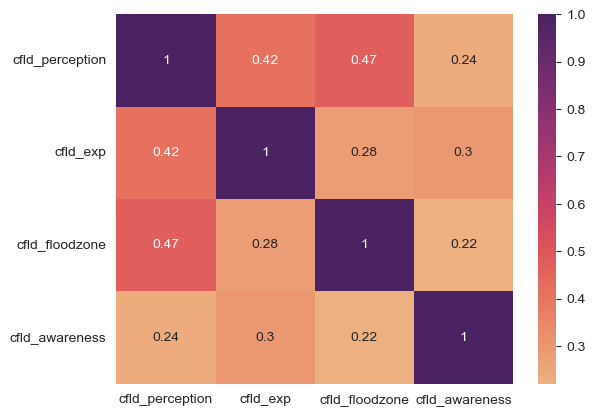

In [33]:
variables = ['cfld_perception', 'cfld_exp', 'cfld_floodzone', 'cfld_awareness']
sns.heatmap(sub_df[variables].corr(), cmap = 'flare', annot=True)

In [34]:
NumFloodzone = len(sub_df[sub_df.cfld_floodzone == 1]) # number of respondents living in floodzones
NumNoFloodzone = len(sub_df[sub_df.cfld_floodzone == 0])
NumExp = len(sub_df[sub_df.cfld_exp == 1]) # number of respondents with flood experience
NumFloodzoneExp = len(sub_df[(sub_df.cfld_floodzone == 1) & (sub_df.cfld_exp == 1)]) # number of respondents who live in floodzones and have flood experience
NumNoFloodzoneExp = len(sub_df[(sub_df.cfld_floodzone == 0) & (sub_df.cfld_exp == 1)])
share = NumFloodzoneExp/NumFloodzone * 100
print('share of respondents in flood zones who have experiecned flood =',share, '%')
shareNoFloodzone = NumNoFloodzoneExp / NumNoFloodzone * 100
print('share of respondents who have experienced flood outside a floodzone=', shareNoFloodzone,'%')

share of respondents in flood zones who have experiecned flood = 56.060606060606055 %
share of respondents who have experienced flood outside a floodzone= 15.562913907284766 %


<span style = 'color:lightgreen'>
findings: 


- all possible predictors correlate at least a bit
- floodzone and perception correlate (albeit less than expected) (47%)
- experience and perception correlate even less than floodzone and perception (42%)
- one explanation: experience and floodzone correlate at 28% -> low correlations with floodzones stem from the fact that 15% of flood experiences were recorded outside a floodzone
<span>

<span style = 'color:orange'>


In [35]:
sub_df.rentmortgage.unique()

array([1250., 3000.,   nan, 1750.,  250.,    0.,  875., 2250., 2750.,
        675.])

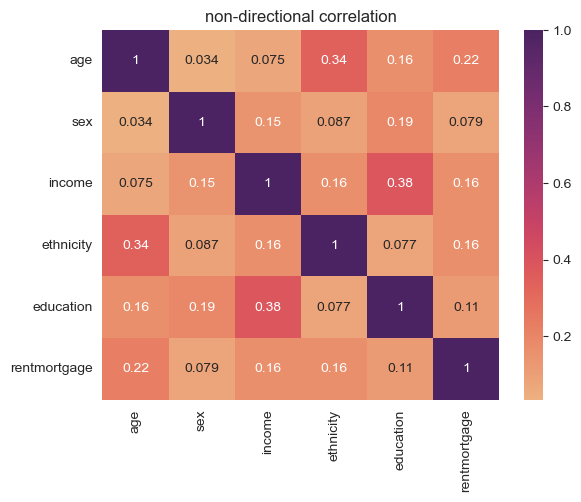

In [36]:
variables = ['age', 'sex', 'income', 'ethnicity', 'education', 'rentmortgage']
sns.heatmap(sub_df[variables].corr().abs(), cmap='flare', annot = True) # note that effect directions are taken out for purpose of color mapping
plt.title('non-directional correlation');

<span style= 'color:lightgreen'>
findings: 

- correlation among covariates are small 
- notably, low correlation between age and income
- variables are nominal, correlation mathematically incorrect. 

<span style= 'color:orange'>
Let's map relationships between covariates and responses


In [37]:
np.corrcoef(sub_df.age, sub_df.cfld_perception)[0,1]

-0.3162359924815746

In [38]:
variables = ['cfld_perception', 'cfld_exp', 'cfld_floodzone', 'cfld_awareness']
index = ['cor with age', 'cor with sex', 'cor with income', 'cor with rentmortgage', 'cor with ethnicity', 'cor with education']
age = [np.corrcoef(sub_df.age, sub_df[var])[0,1] for var in variables]
sex = [np.corrcoef(sub_df.sex, sub_df[var])[0,1] for var in variables]
income = [np.corrcoef(sub_df.income, sub_df[var])[0,1] for var in variables]
rentmortgage = [np.corrcoef(sub_df.rentmortgage, sub_df[var])[0,1] for var in variables]
ethnicity = [np.corrcoef(sub_df.ethnicity, sub_df[var])[0,1] for var in variables]
education = [np.corrcoef(sub_df.education, sub_df[var])[0,1] for var in variables]

cor_df = pd.DataFrame([age ,sex, income, rentmortgage, ethnicity, education], index = index, columns = variables).transpose()
cor_df

,cor with age,cor with sex,cor with income,cor with rentmortgage,cor with ethnicity,cor with education
cfld_perception,-0.316236,0.055139,-0.107882,NaN,0.169281,-0.090865
cfld_exp,-0.187771,0.017788,0.000532,NaN,0.044435,-0.078118
cfld_floodzone,-0.215425,0.010617,-0.113172,NaN,0.077969,-0.103853
cfld_awareness,-0.035906,0.036802,-0.052002,NaN,0.150333,0.006784


<span style='color:lightgreen'>
findings: 

- older respondents are expecting less flooding
- older respondents are less likely to haev experienced floodings??? Look into variables coding
- higher income is weakly correlated with less flood expectations
- ethnicity and awareness are weakly correlated


- note that don't know is coded as 2 -> correlations are only 'quick and dirty' indicator. No rank ordering possible hence, Spearman not an option either. Maybe try ANOVA or Point-Biserial? 
<span>

<span style = 'color:orange'>
Let's have a look at correlations between outcome variables
<span>

<Axes: >

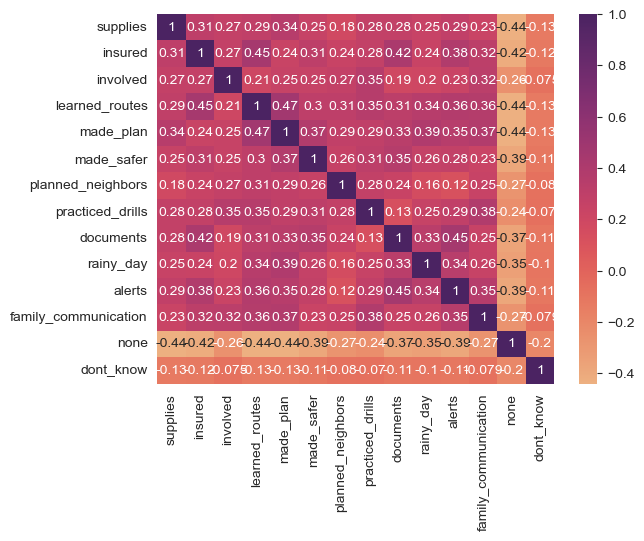

In [39]:
variables = ['supplies', 'insured', 'involved', 'learned_routes', 'made_plan',
             'made_safer', 'planned_neighbors', 'practiced_drills', 'documents', 'rainy_day',
             'alerts', 'family_communication', 'none', 'dont_know']
sns.heatmap(sub_df[variables].corr(),cmap='flare', annot=True)

<span style= 'color:lightgreen'>
findings: 

- all of the above correlate in same range: no specific links between specific types of adaptation 
- learned_routs and insured correlate stronger
- documents and insured correlate stronger
- alerts and insured correlate stronger
- made_plan and learned_routes correlate stronger
- alerts and documents correlate stronger

#### <span style='color:orange'>Let's start with spatial mapping<span>

In [40]:
path = 'data/shapefiles/tl_2024_us_zcta520.shp'
shp_gdf = gpd.read_file(path)
shp_gdf.head()

,ZCTA5CE20,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47236,47236,860Z200US47236,B5,G6350,S,1029063,0,+39.1517426,-085.7252769,"POLYGON ((-85.7341 39.15597, -85.72794 39.1561..."
1,47870,47870,860Z200US47870,B5,G6350,S,8830,0,+39.3701518,-087.4735141,"POLYGON ((-87.47414 39.37016, -87.47409 39.370..."
2,47851,47851,860Z200US47851,B5,G6350,S,53326,0,+39.5735839,-087.2459559,"POLYGON ((-87.24769 39.5745, -87.24711 39.5744..."
3,47337,47337,860Z200US47337,B5,G6350,S,303089,0,+39.8027537,-085.4372850,"POLYGON ((-85.44357 39.80328, -85.44346 39.803..."
4,47435,47435,860Z200US47435,B5,G6350,S,13302,0,+39.2657557,-086.2951577,"POLYGON ((-86.29592 39.26547, -86.29592 39.266..."


In [41]:
(shp_gdf.ZCTA5CE20 != shp_gdf.GEOID20).any() # perfect cuplicates

False

In [42]:
shp_gdf = shp_gdf.drop(columns=['ZCTA5CE20','GEOIDFQ20','CLASSFP20','MTFCC20','FUNCSTAT20','ALAND20','AWATER20','INTPTLAT20','INTPTLON20'])

In [43]:
shp_gdf[shp_gdf.GEOID20 == '07031']

,GEOID20,geometry
23745,07031,"POLYGON ((-74.14753 40.78649, -74.14746 40.786..."


In [44]:
#merging files 
sub_df.head()

,id,state,zipcode,geographic_division,census_region,county,cfld_awareness,cfld_perception,cfld_exp,cfld_floodzone,...,family_communication,none,dont_know,age,sex,education,ethnicity,homeownership,income,rentmortgage
0,1,Washington,98033,Pacific,West,King,0,2,0,0,...,0,0,0,25.0,0,4,0,1,87500,1250.0
1,2,Florida,33950,South Atlantic,South,Charlotte,1,1,1,1,...,0,0,0,55.0,1,5,0,1,175000,3000.0
2,3,New Jersey,7031,Middle Atlantic,Northeast,Bergen,0,1,1,0,...,1,0,0,35.0,1,1,1,0,47500,1250.0
3,4,Pennsylvania,19115,Middle Atlantic,Northeast,Philadelphia,2,3,2,0,...,0,0,1,45.0,1,1,0,0,62500,NaN
4,5,Pennsylvania,19148,Middle Atlantic,Northeast,Philadelphia,0,1,1,0,...,0,0,0,35.0,0,4,0,1,125000,1250.0


<span style = 'color:red'>
So apparently FEMA has coded zipcodes as int and now we lost all the zero's in the beggining of zipcodes :)

Let's fix this in here so that we don't have to work in excel for each data import
<span>

In [45]:
sub_df.zipcode = sub_df.zipcode.astype('string')

for i in sub_df.index: 
    if len(sub_df.at[i,'zipcode']) == 4: 
        sub_df.at[i,'zipcode'] = str(0) + sub_df.at[i,'zipcode']
    if len(sub_df.at[i,'zipcode']) <= 4:
        print(i)
# classic lets try shit and pray loop... Make sure we fetched all exceptions...

In [46]:
# lets merge it baby
shp_gdf= shp_gdf.rename(columns={'GEOID20':'zipcode'})
gdf = sub_df.merge(shp_gdf, on = 'zipcode', how = 'left')
gdf = gpd.GeoDataFrame(gdf, geometry = gdf.geometry)
gdf.head()

,id,state,zipcode,geographic_division,census_region,county,cfld_awareness,cfld_perception,cfld_exp,cfld_floodzone,...,none,dont_know,age,sex,education,ethnicity,homeownership,income,rentmortgage,geometry
0,1,Washington,98033,Pacific,West,King,0,2,0,0,...,0,0,25.0,0,4,0,1,87500,1250.0,"POLYGON ((-122.24342 47.68952, -122.23526 47.6..."
1,2,Florida,33950,South Atlantic,South,Charlotte,1,1,1,1,...,0,0,55.0,1,5,0,1,175000,3000.0,"POLYGON ((-82.09962 26.91135, -82.09949 26.912..."
2,3,New Jersey,07031,Middle Atlantic,Northeast,Bergen,0,1,1,0,...,0,0,35.0,1,1,1,0,47500,1250.0,"POLYGON ((-74.14753 40.78649, -74.14746 40.786..."
3,4,Pennsylvania,19115,Middle Atlantic,Northeast,Philadelphia,2,3,2,0,...,0,1,45.0,1,1,0,0,62500,NaN,"POLYGON ((-75.07456 40.08912, -75.07137 40.092..."
4,5,Pennsylvania,19148,Middle Atlantic,Northeast,Philadelphia,0,1,1,0,...,0,0,35.0,0,4,0,1,125000,1250.0,"POLYGON ((-75.17492 39.8986, -75.17486 39.8989..."


In [47]:
sub_df.shape

(507, 31)

In [48]:
gdf.shape

(507, 32)

In [49]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [50]:
# adjust crs to cx requirements (Web Mercator)
gdf = gdf.to_crs(epsg=3857)  
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# bounds 
us_bounds = (-14000000, 3000000, -7000000, 6500000)  # (xmin, ymin, xmax, ymax)
us_bounds = (-14000000, 3000000, -7000000, 6500000)  
south_bounds = (-10800000, 2500000,  -8400000, 4200000)
northeast_bounds = (-9000000, 3000000, -7300000, 6100000)

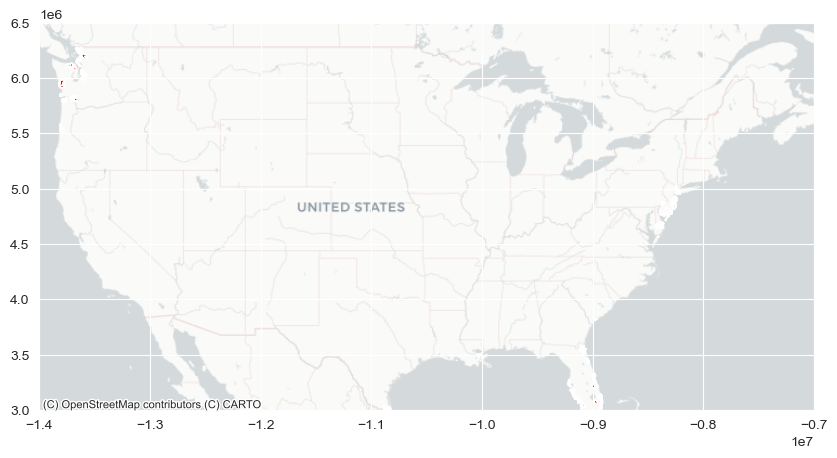

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color='red', alpha=1, markersize=30)
ax.set_xlim(us_bounds[0], us_bounds[2])  # Longitude limits
ax.set_ylim(us_bounds[1], us_bounds[3])  # Latitude limits
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

<span style = 'color:orange'>
Let's drill down further into the northeast and south west areas 
<span>

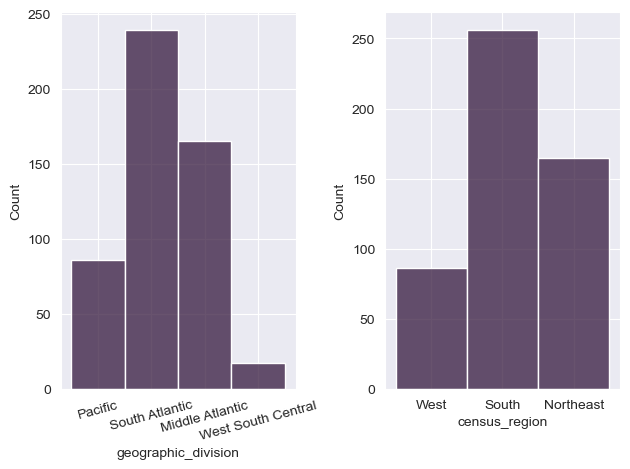

In [76]:
fig, ax = plt.subplots(1,2)
sns.histplot(gdf.geographic_division, ax = ax[0])
sns.histplot(gdf.census_region, ax = ax[1])
ax[0].tick_params(axis='x', rotation = 15)
plt.tight_layout()

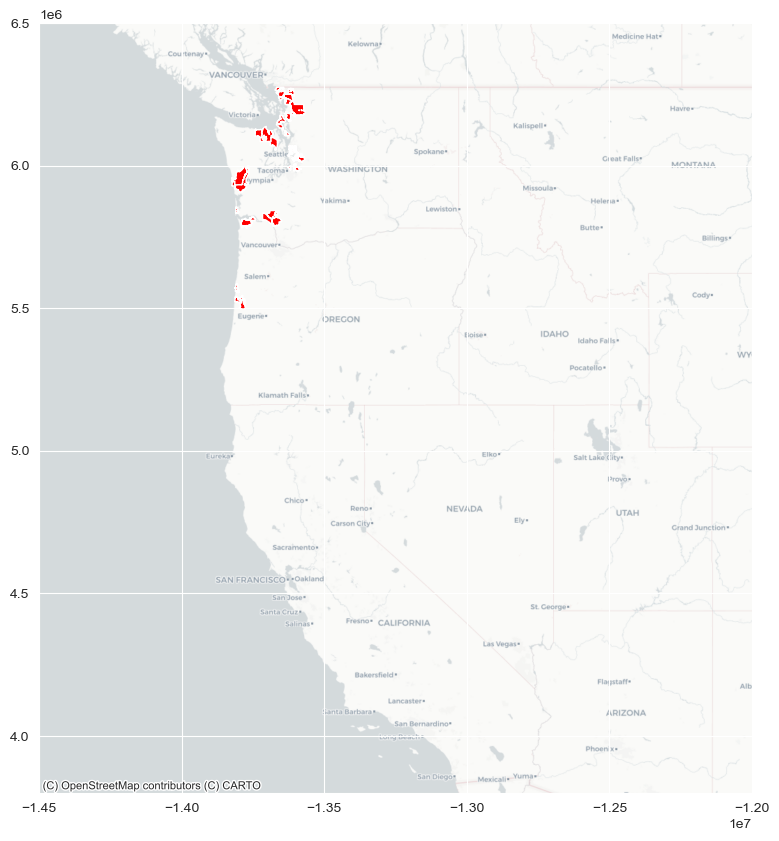

In [108]:
# let's have a look at the west coast. 
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color='red', alpha=1, markersize=300)
ax.set_xlim(west_bounds[0], west_bounds[2])  # Longitude limits
ax.set_ylim(west_bounds[1], west_bounds[3])  # Latitude limits
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

<span style= 'color:lightgreen'>
findings: 

- California has flodings but no responses in the survey. Check against zipcodes.
